In [2]:
import numpy as np
import pickle
import cv2
import tensorflow as tf
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import load_model
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
np.set_printoptions(precision = 3, suppress = True)
from sklearn import model_selection

#from tensorflow.keras import  layers
#from tensorflow.keras.layers.experimental import preprocessing

In C:\Users\Praty\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Praty\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Praty\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Praty\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Praty\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [3]:
train_dataset = pd.read_csv("C:/Users/Praty/OneDrive/Desktop/data.csv")

In [4]:
train_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
len(train_dataset)

569

In [6]:
train_dataset = train_dataset.filter(["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst","diagnosis"])

In [7]:
train_dataset.replace("M",0, inplace = True)
train_dataset.replace("B",1, inplace = True)

In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se                569 

In [9]:
train_dataset['split'] = np.random.randn(train_dataset.shape[0], 1)

msk = np.random.rand(len(train_dataset)) <= 0.7

train = train_dataset[msk]
test = train_dataset[~msk]

In [10]:
model = Sequential([
        Dense(units = 96, input_shape=(30,), activation = 'relu'),
        Dense(units = 64, activation='relu'),
        Dense(units = 32, activation='relu'),
        Dense(units = 24, activation='relu'),
        Dense(units = 12, activation ='relu'),
        Dense(units = 2, activation='softmax')
])

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 30)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 96)                2976      
_________________________________________________________________
dense_31 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 24)                792       
_________________________________________________________________
dense_34 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_35 (Dense)             (None, 2)                

In [11]:
header_list = train_dataset.columns.values
df = train_dataset[header_list[0:31]]
X = df.iloc[:,:30]
Y = train_dataset[['diagnosis']]

In [12]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [13]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
cl =model.fit(x = X, y = Y, batch_size = 10, epochs = 120, verbose =2)

Epoch 1/120
57/57 - 0s - loss: 0.1370 - accuracy: 0.9525
Epoch 2/120
57/57 - 0s - loss: 0.1347 - accuracy: 0.9455
Epoch 3/120
57/57 - 0s - loss: 0.1431 - accuracy: 0.9385
Epoch 4/120
57/57 - 0s - loss: 0.1424 - accuracy: 0.9385
Epoch 5/120
57/57 - 0s - loss: 0.1233 - accuracy: 0.9543
Epoch 6/120
57/57 - 0s - loss: 0.1264 - accuracy: 0.9508
Epoch 7/120
57/57 - 0s - loss: 0.1189 - accuracy: 0.9473
Epoch 8/120
57/57 - 0s - loss: 0.1779 - accuracy: 0.9209
Epoch 9/120
57/57 - 0s - loss: 0.1204 - accuracy: 0.9508
Epoch 10/120
57/57 - 0s - loss: 0.1254 - accuracy: 0.9455
Epoch 11/120
57/57 - 0s - loss: 0.1459 - accuracy: 0.9420
Epoch 12/120
57/57 - 0s - loss: 0.1402 - accuracy: 0.9385
Epoch 13/120
57/57 - 0s - loss: 0.1177 - accuracy: 0.9508
Epoch 14/120
57/57 - 0s - loss: 0.1543 - accuracy: 0.9438
Epoch 15/120
57/57 - 0s - loss: 0.1464 - accuracy: 0.9420
Epoch 16/120
57/57 - 0s - loss: 0.1284 - accuracy: 0.9473
Epoch 17/120
57/57 - 0s - loss: 0.1320 - accuracy: 0.9490
Epoch 18/120
57/57 - 0s

In [36]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [38]:
properties = list(normalized_df.columns.values)
properties.remove('diagnosis')
#properties.remove('0')
#properties.remove('1')
print(properties)
X = normalized_df[properties]
y = normalized_df['diagnosis']

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [39]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
#from keras.optimizers import SGD
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(96, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(24, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.sigmoid),
])

model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size = 10, epochs = 100,validation_data=(X_val, y_val))

Epoch 1/100
37/37 [==============================] - 1s 9ms/step - loss: 0.6701 - accuracy: 0.4628 - val_loss: 0.5803 - val_accuracy: 0.6923
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.8277 - val_loss: 0.4407 - val_accuracy: 0.8571
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.9147 - val_loss: 0.3289 - val_accuracy: 0.9341
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.9535 - val_loss: 0.2323 - val_accuracy: 0.9451
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9525 - val_loss: 0.1227 - val_accuracy: 0.9560
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9620 - val_loss: 0.3003 - val_accuracy: 0.8791
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9137 - val_loss: 0.1240 - val_accuracy: 0.9451
Epoch 8/100
3

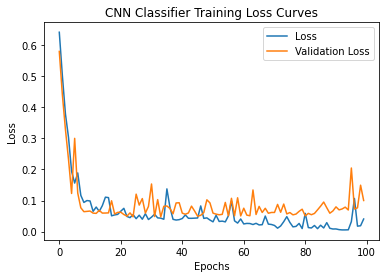

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.title("CNN Classifier Training Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## LOGISITC REGRESSION

In [16]:
X_Train, X_Test, Y_Train, Y_Test = model_selection.train_test_split(X, Y, test_size=0.20, random_state = 101)

In [44]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
Logistic_Reg = LogisticRegression(penalty = 'l2', tol = 0.0001, C = 1.0)
Logistic_Reg.fit(X_Train, Y_Train)
print("LOGISTIC REGRESSION :", Logistic_Reg.score(X_Test, Y_Test))

Y_PREDICTION = Logistic_Reg.predict(X_Test)
print("ACCURACY OF MODEL :", metrics.accuracy_score(Y_Test, Y_PREDICTION))

#USING CROSS VALIDATION

scores = cross_val_score(Logistic_Reg, X, y, cv = 5)
print("CROSS-V:", scores.mean())

LOGISTIC REGRESSION : 0.9385964912280702
ACCURACY OF MODEL : 0.9385964912280702
CROSS-V: 0.9630957925787922


C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Praty\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# SAVING THE MODELS H5 FILE FOR ANN and Pickle for LOGISTIC REG
from keras.models import load_model
model.save("C:/Users/Praty/OneDrive/Desktop/breast_cancer.h5")
filename = 'C:/Users/Praty/OneDrive/Desktop/Breast_cancer_lr.pckl' 
pickle.dump(Logistic_Reg, open(filename, 'wb'))